In [3]:
import os
import cv2 #OpenCV
import numpy as np #Biblioteca Numerica
import matplotlib.pyplot as plt #Visualizaciones

from zipfile import ZipFile
from urllib.request import urlretrieve
from scipy.signal import convolve2d

from IPython.display import Image

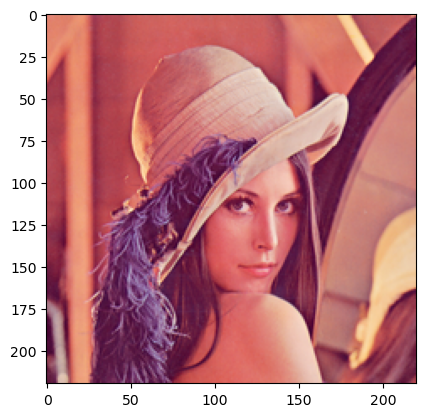

In [6]:
# Carga una imagen a color..
image = cv2.imread("../imagenes/lena.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

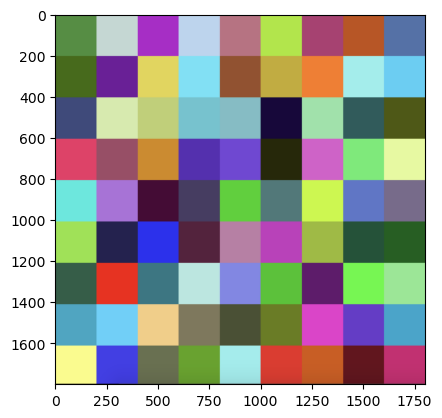

In [8]:
# Imagen para verificar la correcta aplicacion del filtro..
image2 = cv2.imread("checkerboard_color.png")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

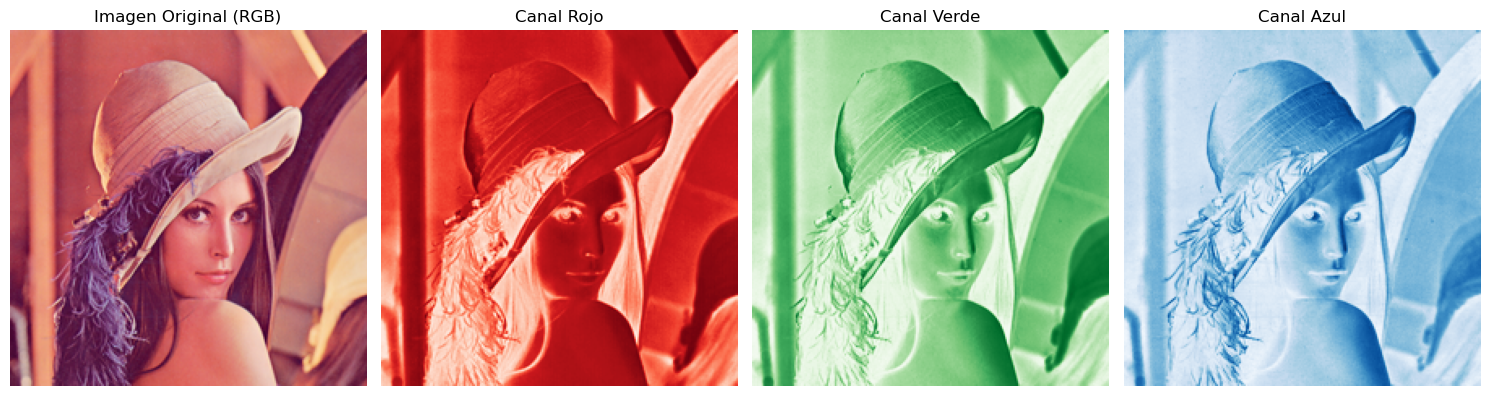

In [43]:
# Extraer cada canal de color
image_r = image_rgb[:, :, 0]  # Canal Rojo
image_g = image_rgb[:, :, 1]  # Canal Verde
image_b = image_rgb[:, :, 2]  # Canal Azul

# Mostrar la imagen original y los canales por separado
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Imagen Original (RGB)")
axes[0].axis("off")

axes[1].imshow(image_r, cmap="Reds")
axes[1].set_title("Canal Rojo")
axes[1].axis("off")

axes[2].imshow(image_g, cmap="Greens")
axes[2].set_title("Canal Verde")
axes[2].axis("off")

axes[3].imshow(image_b, cmap="Blues")
axes[3].set_title("Canal Azul")
axes[3].axis("off")

plt.tight_layout()
plt.show()

In [46]:
# VARIABLES
img = np.copy(image2)
filter0 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
filter_prewitt_x = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
filter_prewitt_y = np.array([[-1, -1, -1], 
                   [0, 0, 0],
                   [1, 1, 1]])
# Sobel kernels
filter_sobel_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

filter_sobel_y = np.array([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]])

# Roberts kernels (2x2)
filter_roberts_x = np.array([[1, 0, 0],
                             [0, -1, 0],
                            [0, 0, 0]])

filter_roberts_y = np.array([[0, 0, 0],
                             [0, 0, 1],
                            [0, -1, 0]])

stride = 1
padding1 = "zero"
padding2 = "reflected"
padding_size = 1

In [56]:
def convolucion(img, kernel, stride, padding, padding_size=1):
    h_img, w_img = img.shape
    h_kernel, w_kernel = kernel.shape
    
    # Padding en la imagen antes de la convolución
    if padding == "zero":
        img_padded = np.pad(img, padding_size, mode='constant')
    elif padding == "reflected":
        img_padded = cv2.copyMakeBorder(img, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_REFLECT)
    else:
        img_padded = img

    h_padded, w_padded = img_padded.shape
    h_output = (h_padded - h_kernel) // stride + 1
    w_output = (w_padded - w_kernel) // stride + 1

    output = np.zeros((h_output, w_output))

    for i in range(0, h_output):
        for j in range(0, w_output):
            region = img_padded[i*stride:i*stride+h_kernel, j*stride:j*stride+w_kernel]
            output[i, j] = np.sum(region * kernel)

    return output


In [59]:
imagenes = [
    "../imagenes/blancoNegro.png",
    "../imagenes/cameraman.jpg",
    "../imagenes/figuraV.png",
    "../imagenes/figuraV2.jpg",
    "../imagenes/figures.jpg",
    "../imagenes/gato1.jpg",
    "../imagenes/lena.png",
    "../imagenes/mandrill.jpg",
    "../imagenes/ninioB.png",
    "../imagenes/patrones1.jpg",
    "../imagenes/riceB.png"
]

In [57]:
def aplicar_filtro_color(img_rgb, filtro_x, filtro_y, stride=1, padding="zero", padding_size=1):
    # Separar canales
    r = img_rgb[:, :, 0]
    g = img_rgb[:, :, 1]
    b = img_rgb[:, :, 2]

    # Aplicar convolución en cada canal (con padding para mantener tamaño)
    r_x = convolucion(r, filtro_x, stride, padding, padding_size)
    r_y = convolucion(r, filtro_y, stride, padding, padding_size)
    r_out = np.abs(r_x) + np.abs(r_y)

    g_x = convolucion(g, filtro_x, stride, padding, padding_size)
    g_y = convolucion(g, filtro_y, stride, padding, padding_size)
    g_out = np.abs(g_x) + np.abs(g_y)

    b_x = convolucion(b, filtro_x, stride, padding, padding_size)
    b_y = convolucion(b, filtro_y, stride, padding, padding_size)
    b_out = np.abs(b_x) + np.abs(b_y)

    # Unir canales
    out = np.stack([r_out, g_out, b_out], axis=2)

    # Normalizar a rango 0-255 para visualizar
    out -= out.min()
    if out.max() != 0:
        out = out / out.max()
    out = (out * 255).astype(np.uint8)

    return out


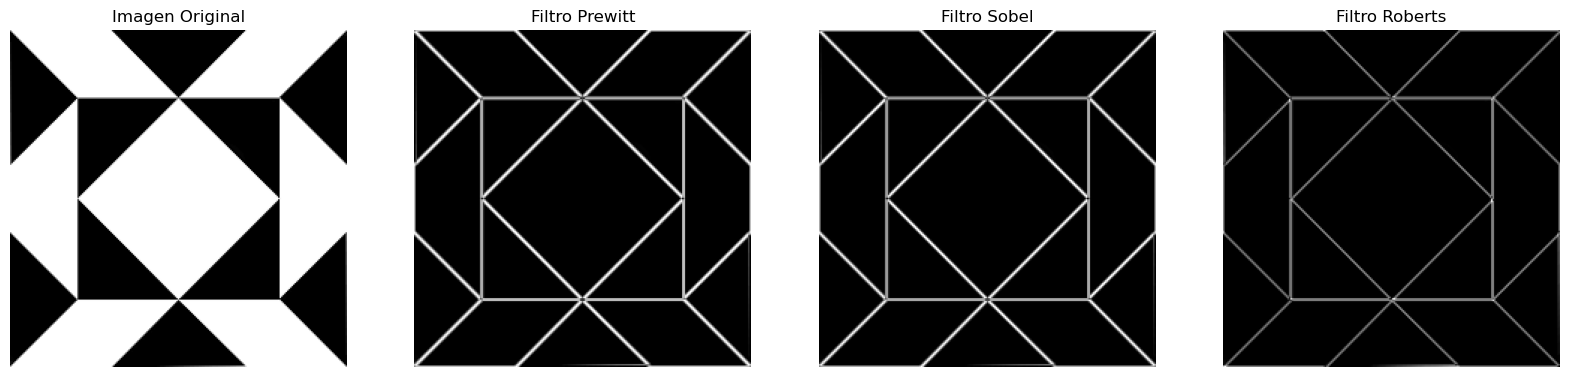

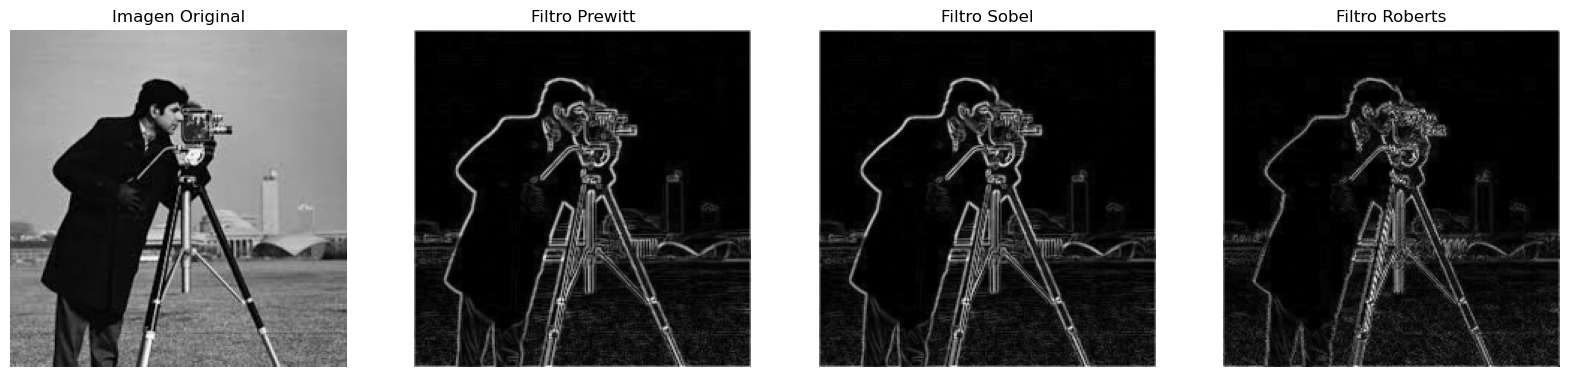

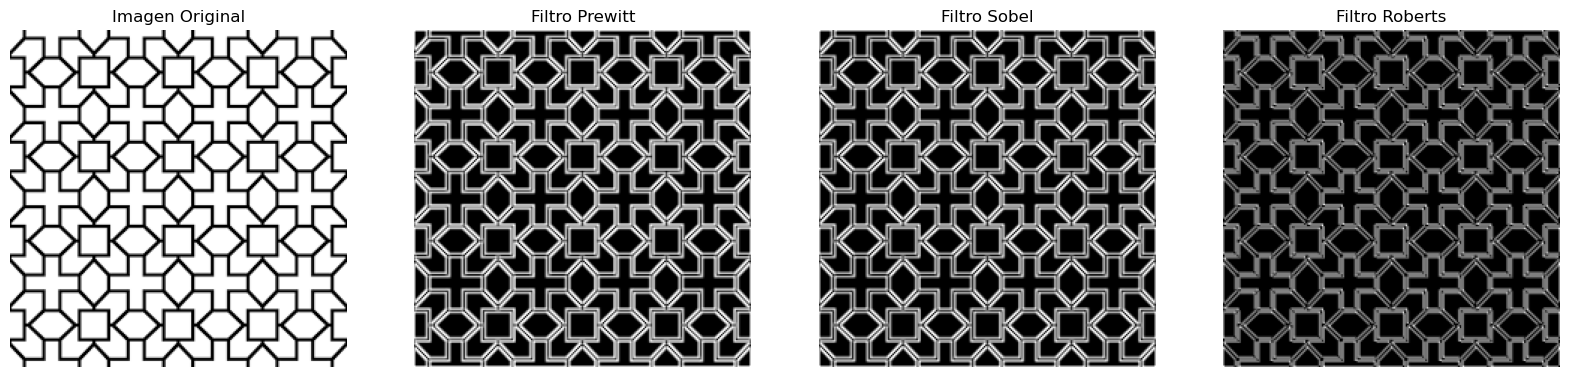

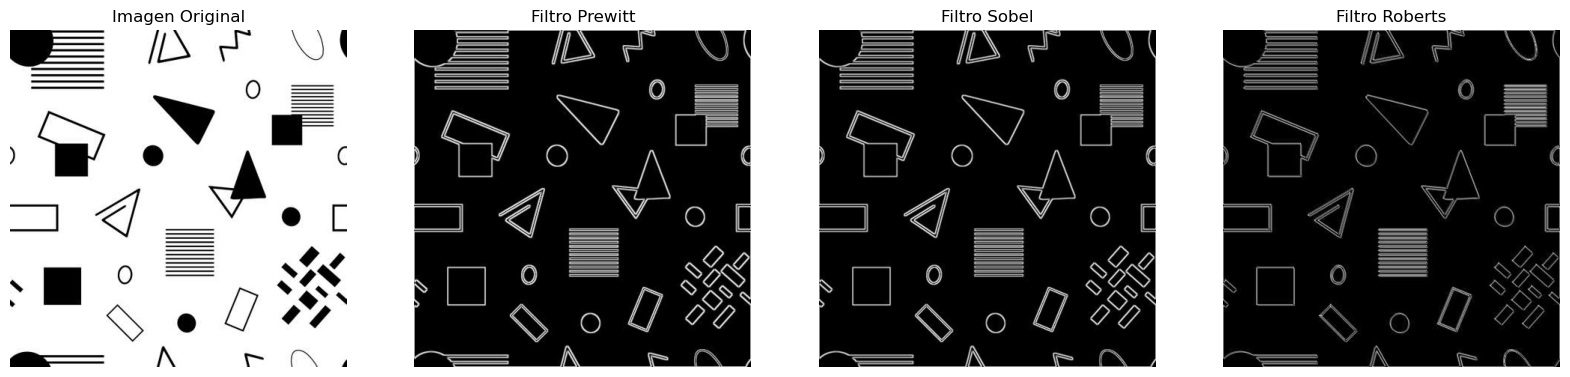

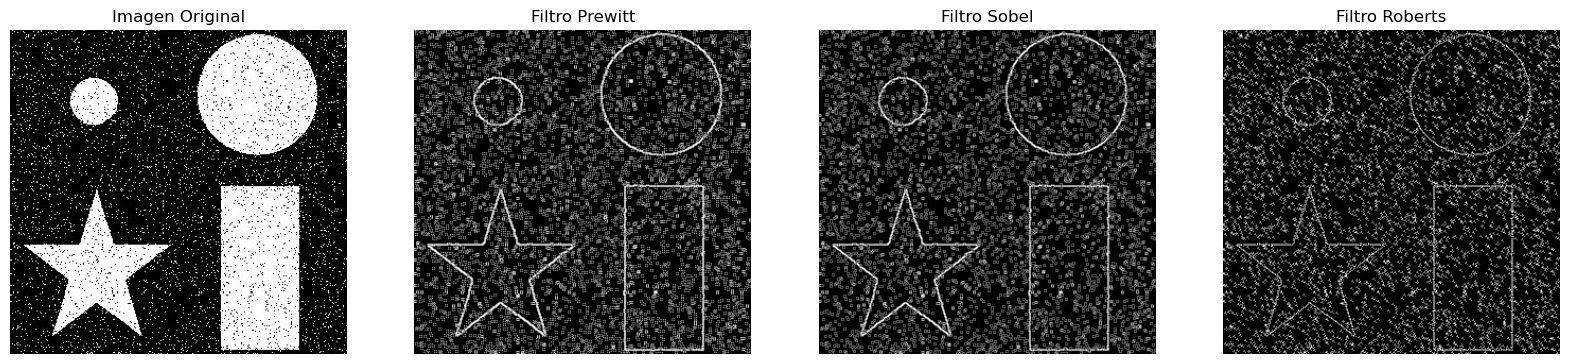

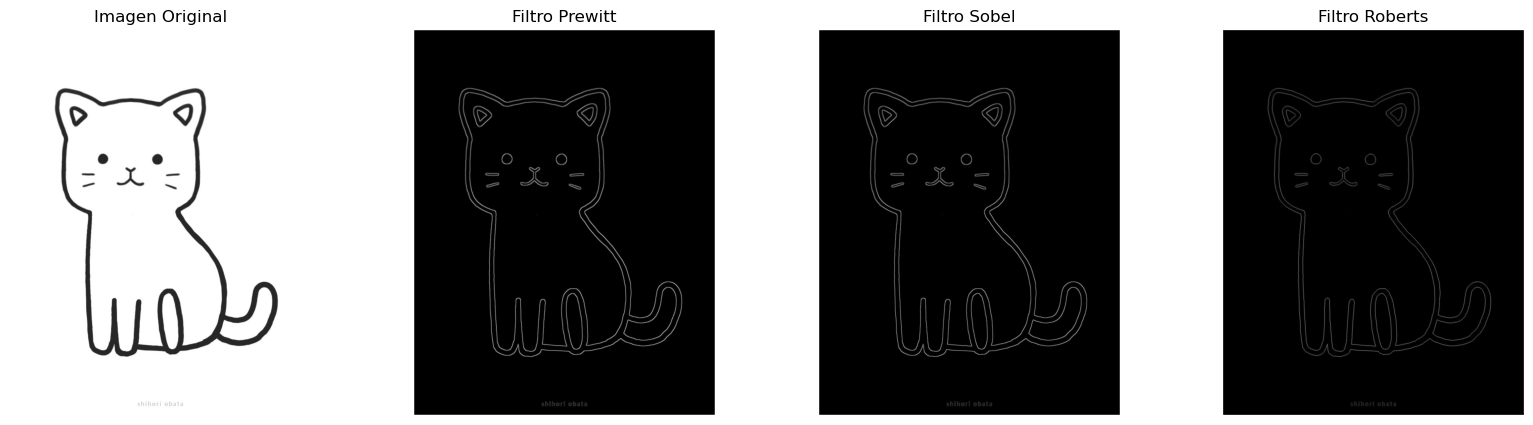

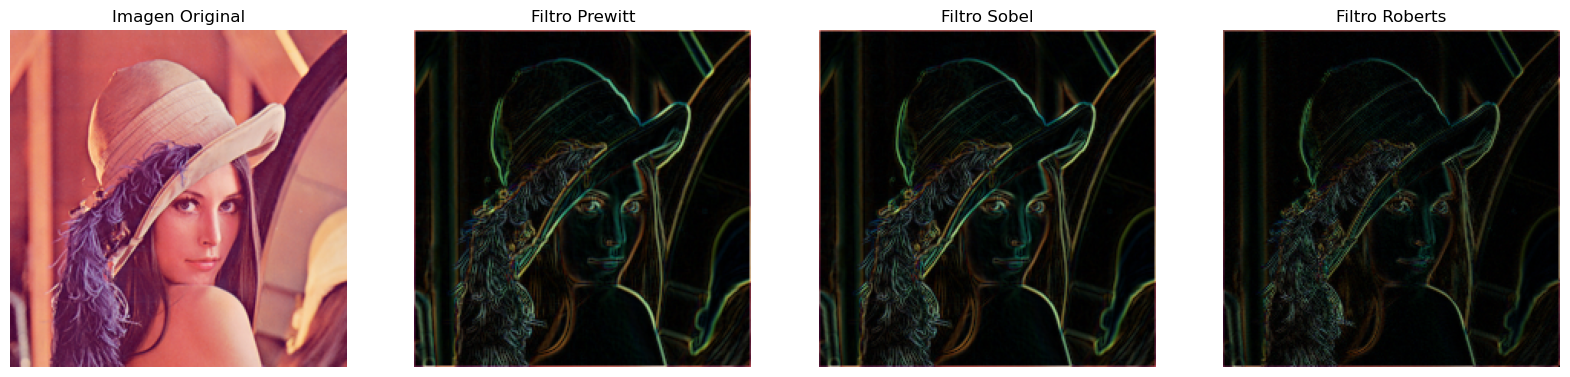

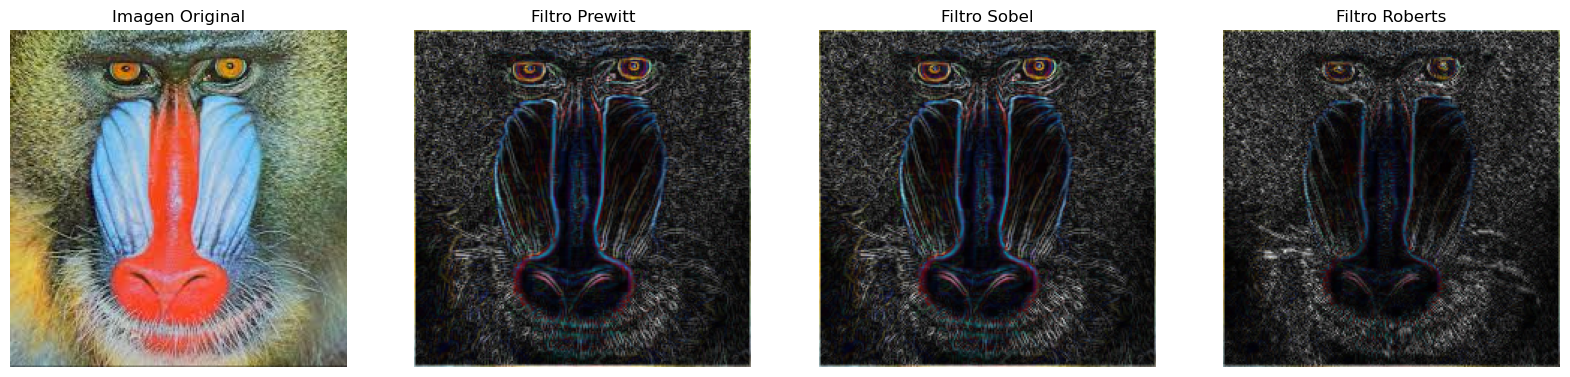

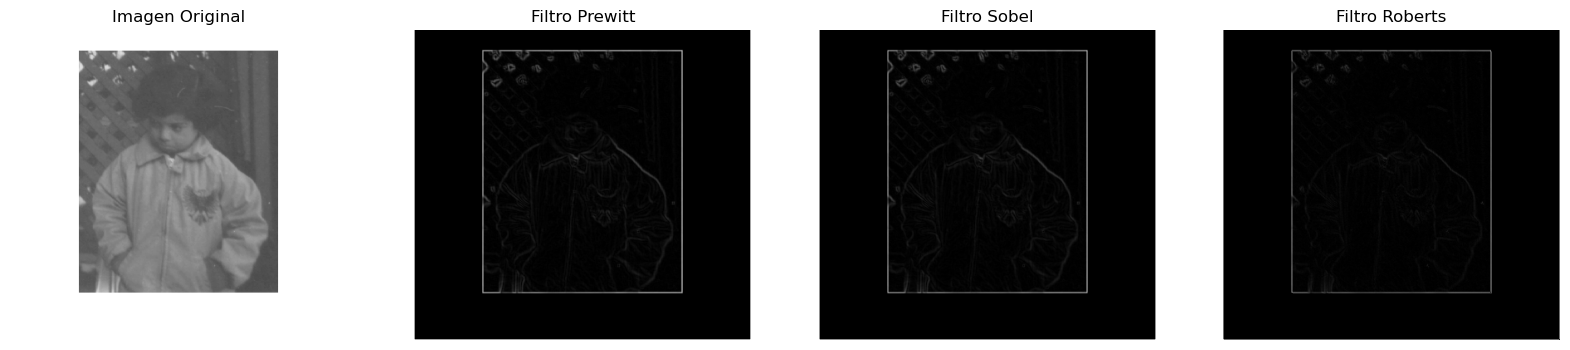

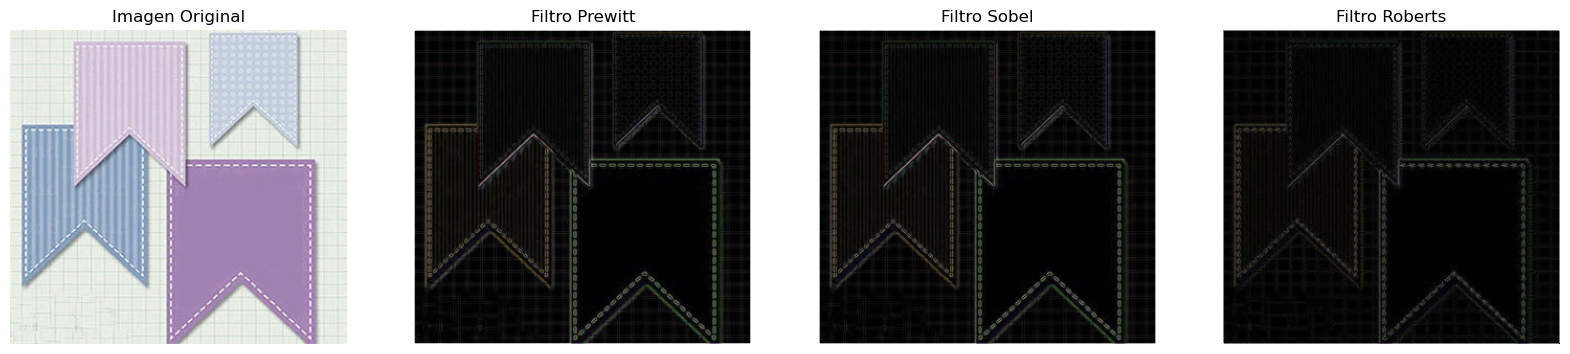

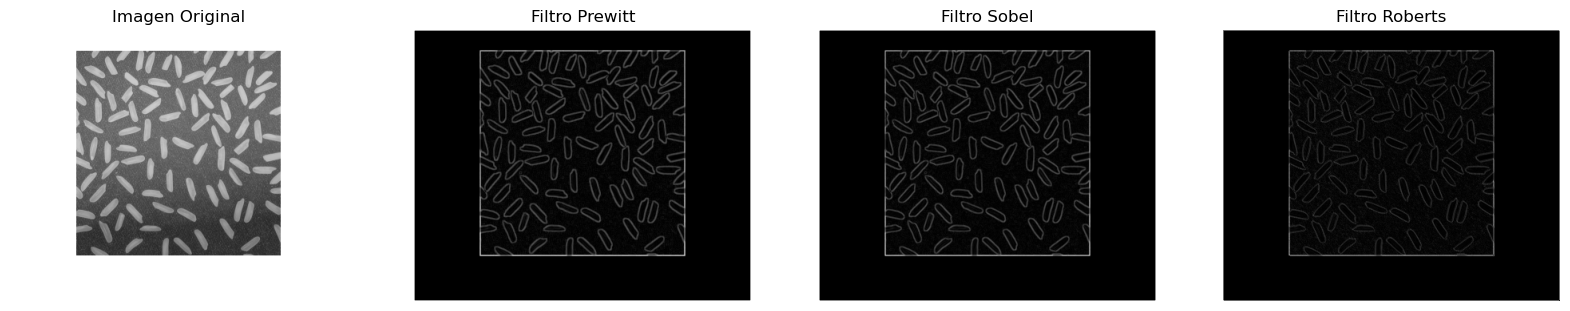

In [64]:
for path in imagenes:
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    img_prewitt = aplicar_filtro_color(image_rgb, filter_prewitt_x, filter_prewitt_y)
    img_sobel = aplicar_filtro_color(image_rgb, filter_sobel_x, filter_sobel_y)
    img_roberts = aplicar_filtro_color(image_rgb, filter_roberts_x, filter_roberts_y)
    
    plt.figure(figsize=(20,5))  # Ancho mayor para 4 imágenes
    
    # Imagen original
    plt.subplot(1,4,1)
    plt.title("Imagen Original")
    plt.imshow(image_rgb)
    plt.axis('off')
    
    # Filtro Prewitt
    plt.subplot(1,4,2)
    plt.title("Filtro Prewitt")
    plt.imshow(img_prewitt)
    plt.axis('off')
    
    # Filtro Sobel
    plt.subplot(1,4,3)
    plt.title("Filtro Sobel")
    plt.imshow(img_sobel)
    plt.axis('off')
    
    # Filtro Roberts
    plt.subplot(1,4,4)
    plt.title("Filtro Roberts")
    plt.imshow(img_roberts)
    plt.axis('off')
    
    plt.show()